In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

import glob,sys,os
from scipy.interpolate import interp1d
%pylab inline

def gridspec(spectra):
    spmin = max([s[0][0] for s in spectra])
    spmax = min([s[0][-1] for s in spectra])
    dwavl = max([s[0][1]-s[0][0] for s in spectra])

    w=np.arange(spmin,spmax,dwavl)
    interpspectra=[interp1d(s[0],s[1])(w) for s in spectra]
    newspectra = np.array([(interpspectra[i]-np.mean(interpspectra[i]))/np.std(interpspectra[i]) for i in range(len(spectra))])
    return w,newspectra

Populating the interactive namespace from numpy and matplotlib


### get data

In [4]:
import pylab as pl
import glob,sys,os

spectra=[]
flist=glob.glob(os.getenv("CFASPECTRA")+"*/spec/*flm")
#print flist
for f in flist:
    try:
        spectra.append(np.loadtxt(f,unpack=True))
    except:
        pass
    try:
        if spectra[-1][0][0]>4000 or spectra[-1][0][-1]<7000:
            del spectra[-1]
            flist.remove(f)
    except:
        if len(spectra)>0:
            del spectra[-1]
            flist.remove(f)

wavelengths,spectra=gridspec(spectra)


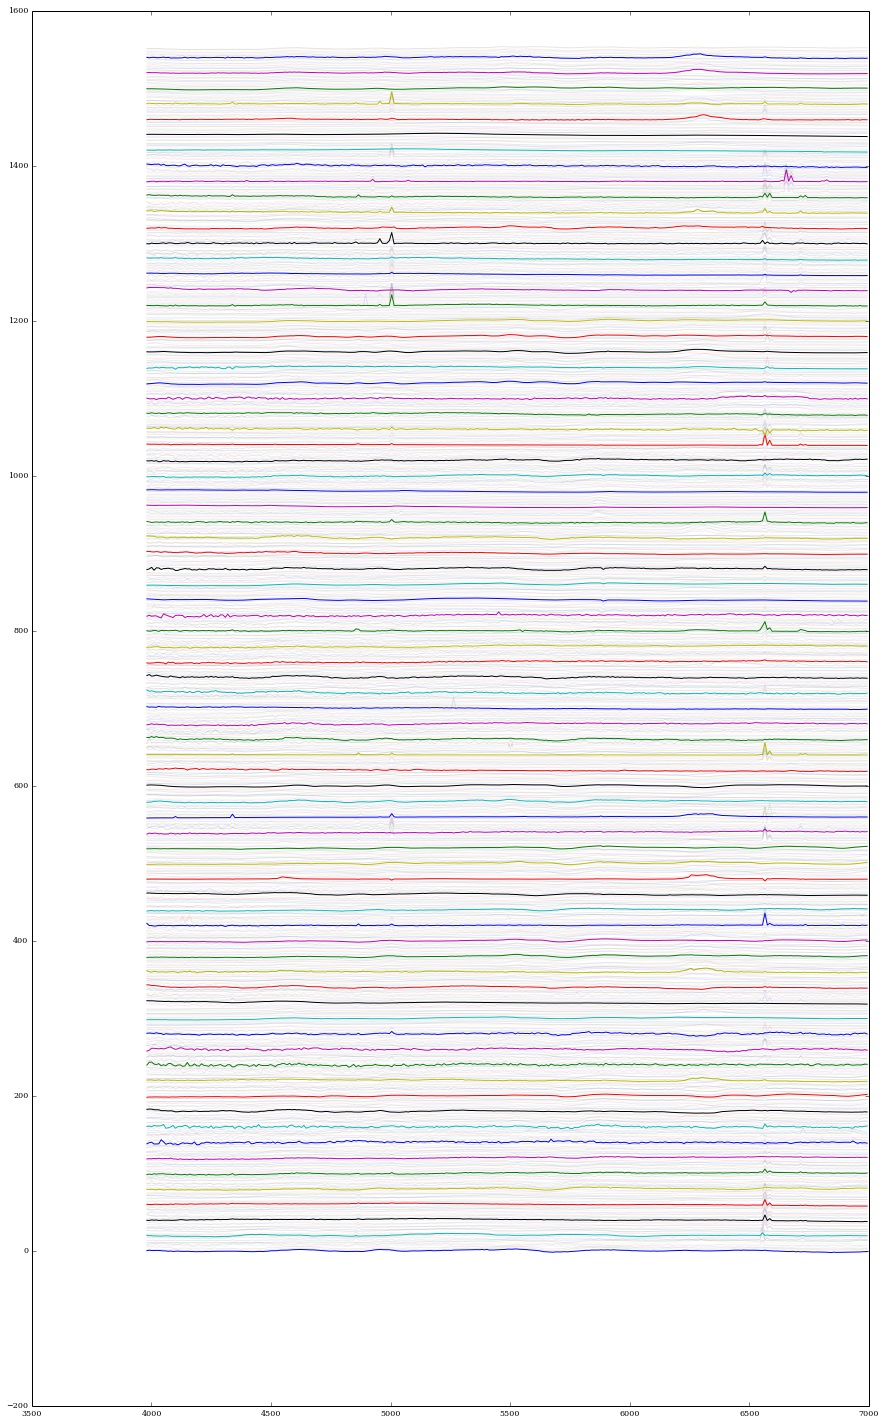

In [3]:
plt.figure(figsize=(15,25))
for i,spec in enumerate(spectra):
    alpha=0.1
    if not i%10:
        alpha=1
    plt.plot(wavelengths,spec+i*2, alpha=alpha)

### PCA decomposition

305 (305,)


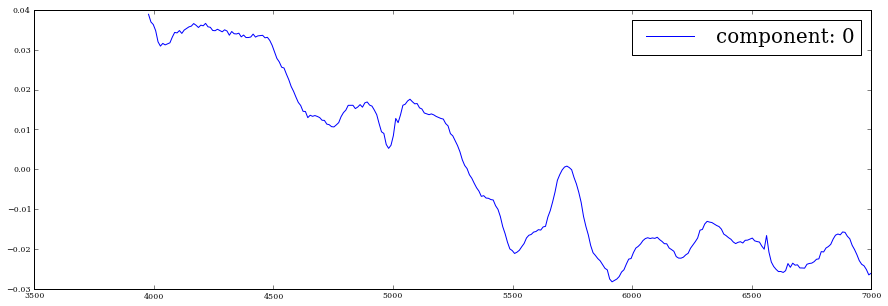

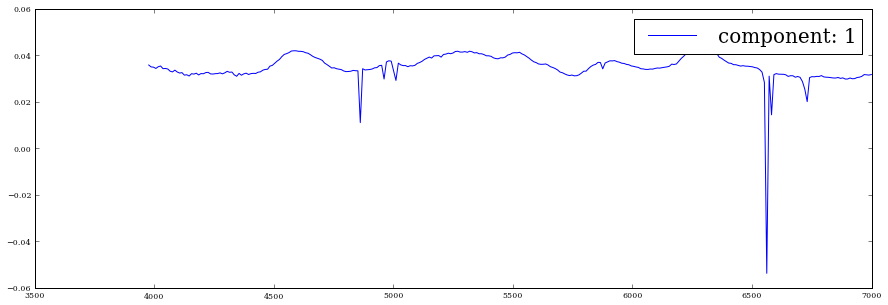

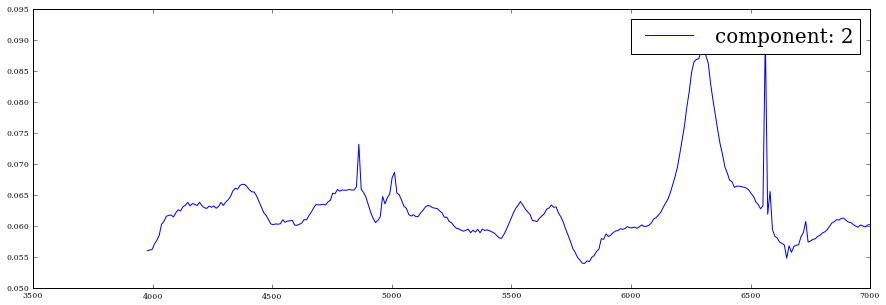

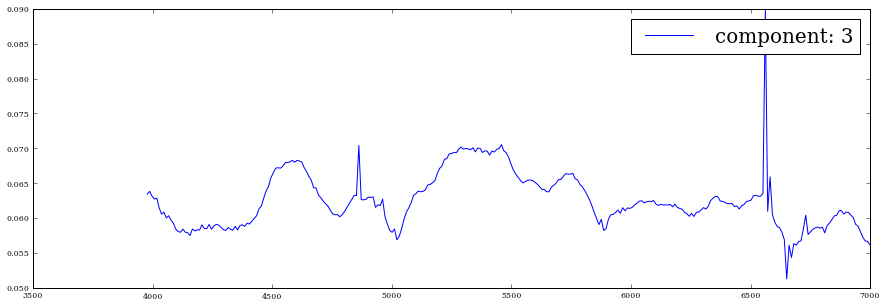

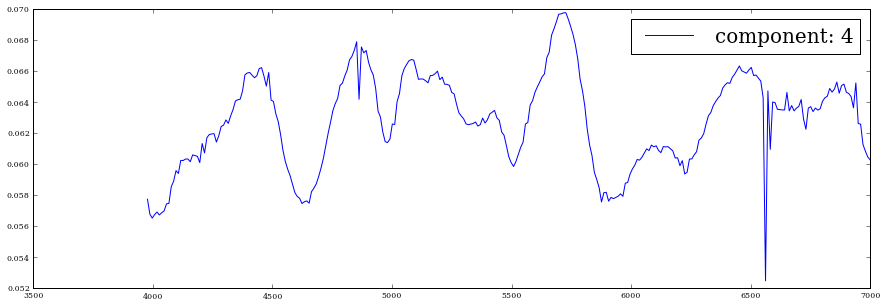

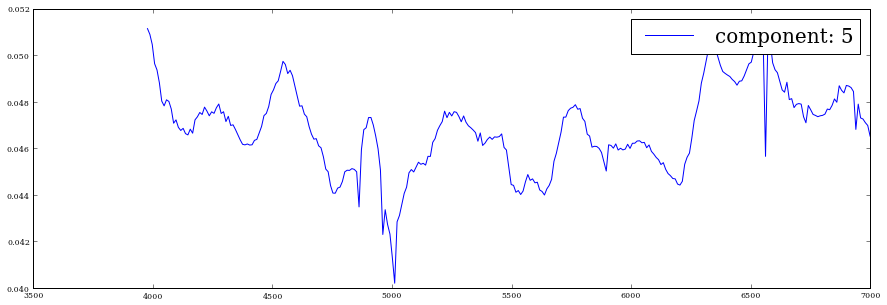

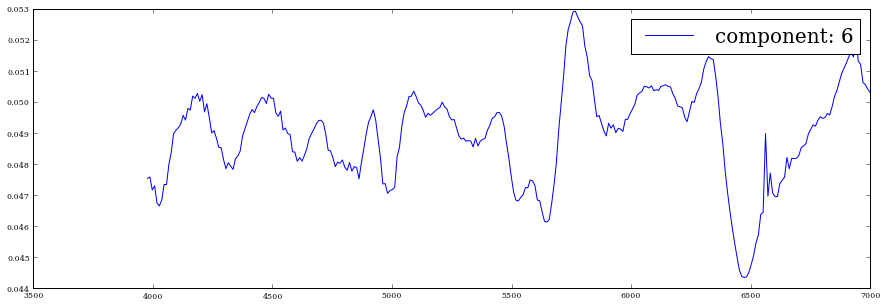

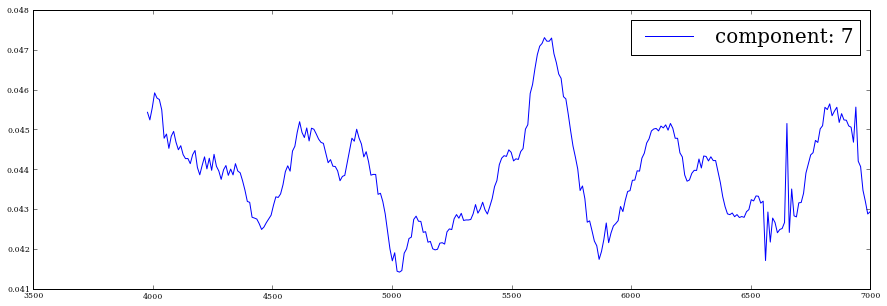

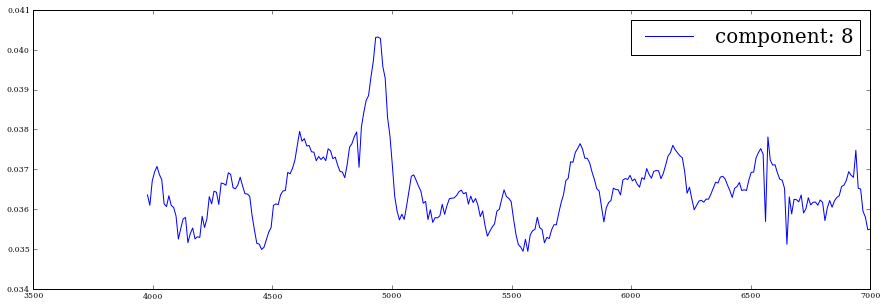

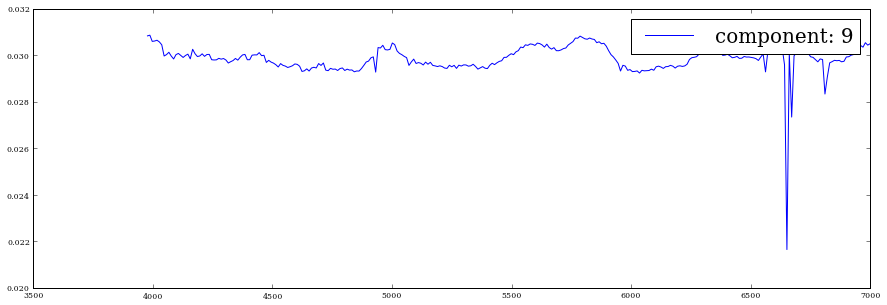

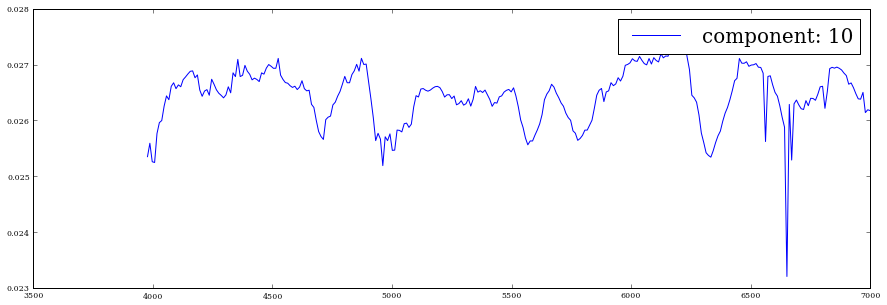

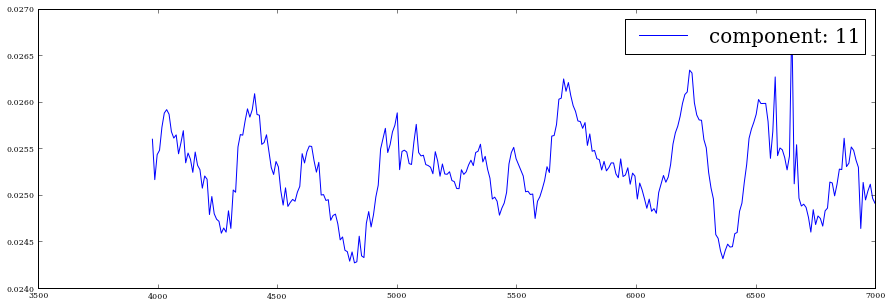

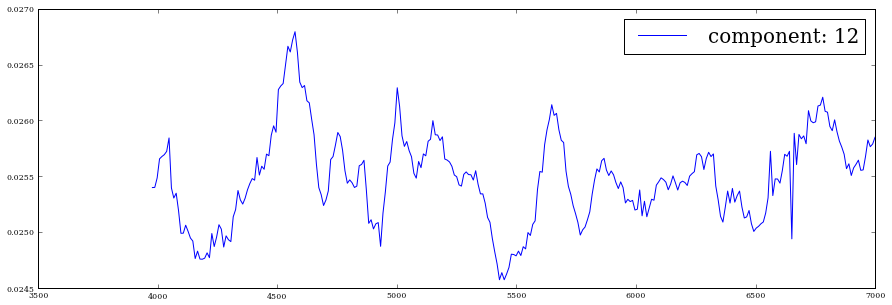

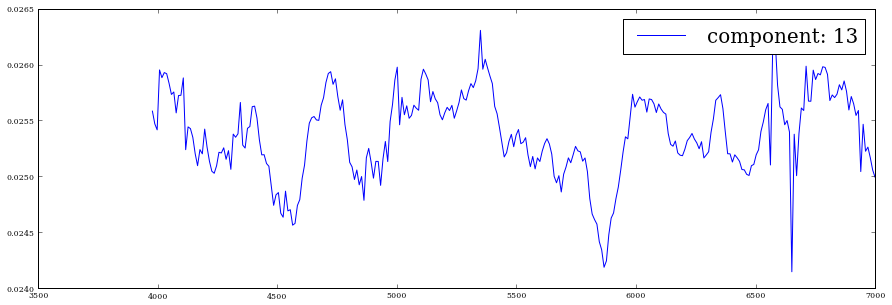

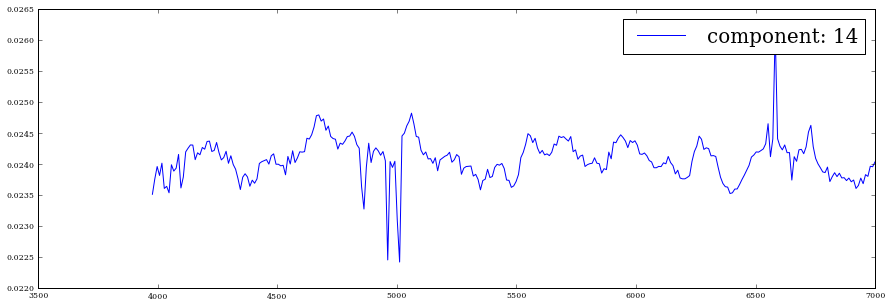

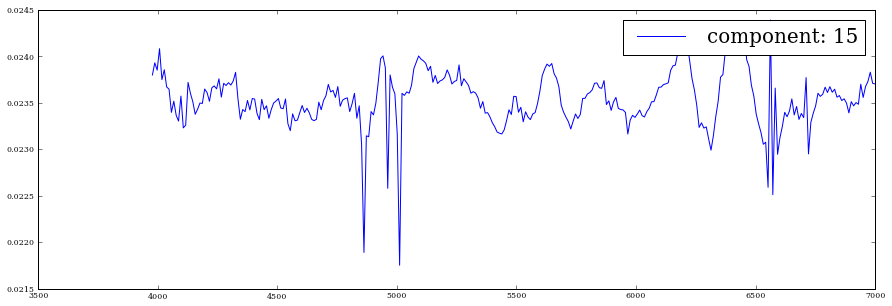

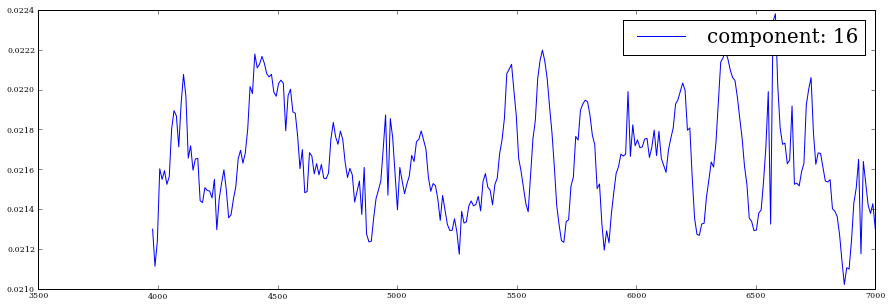

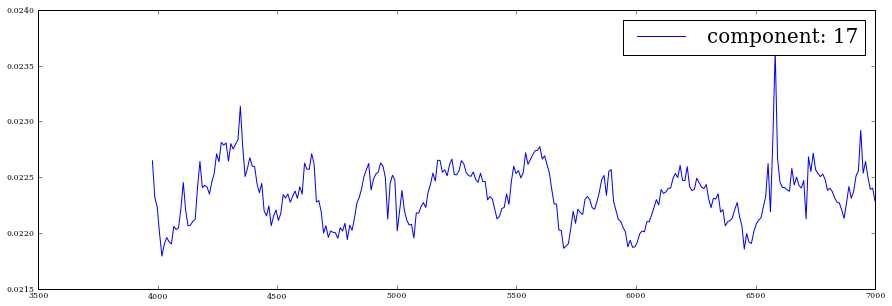

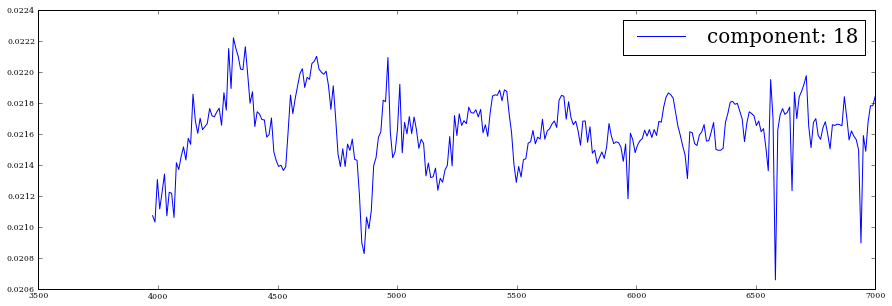

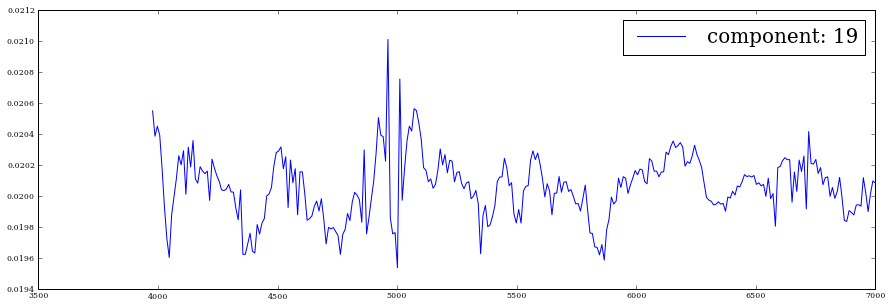

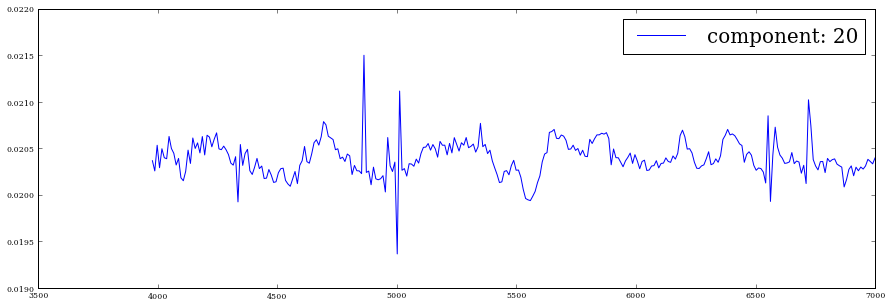

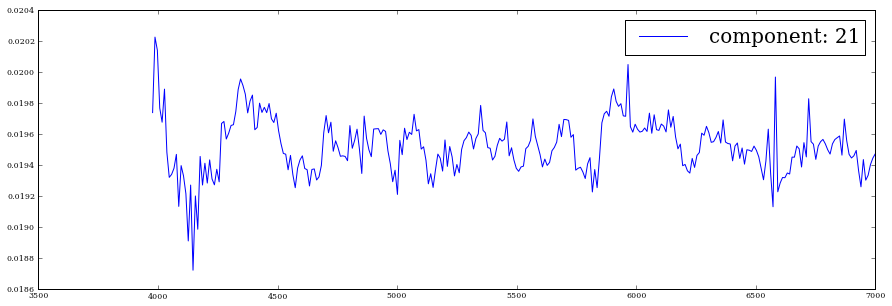

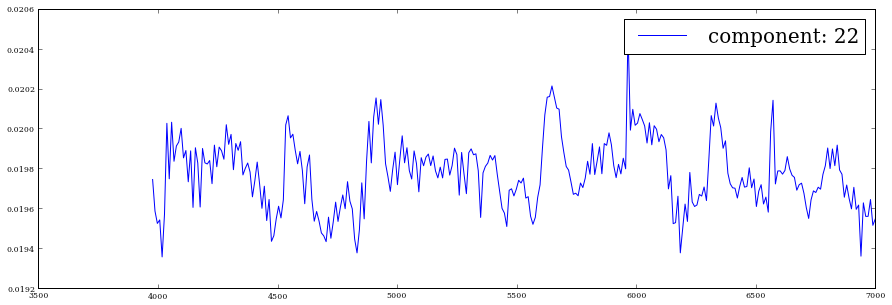

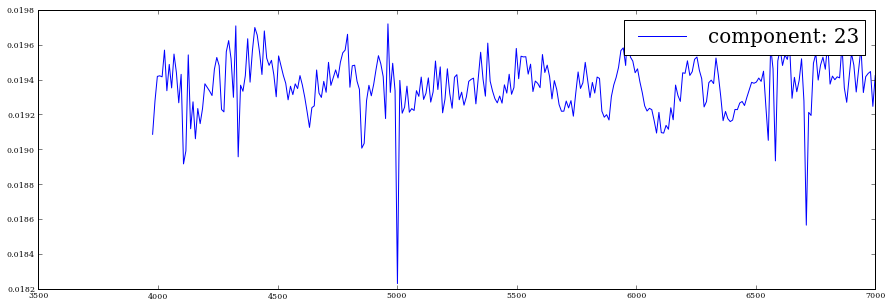

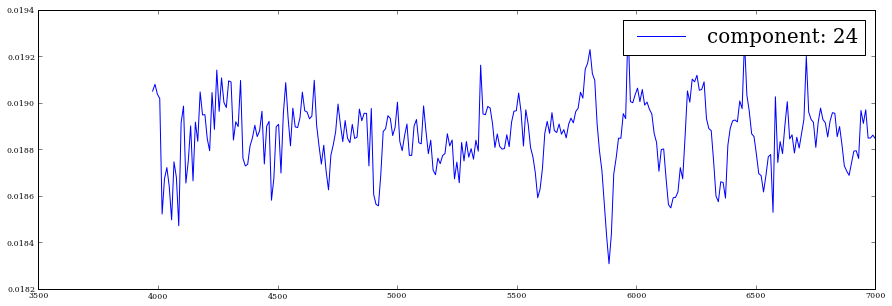

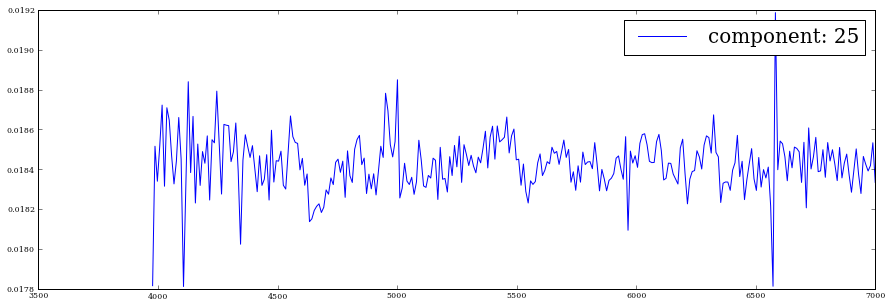

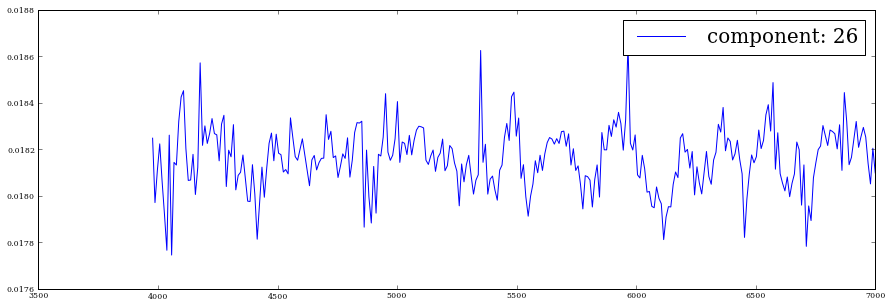

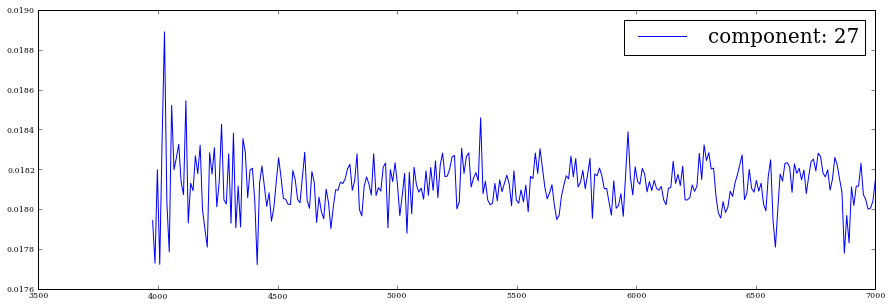

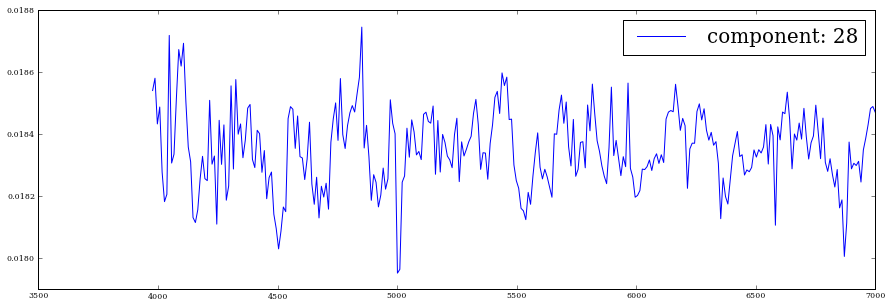

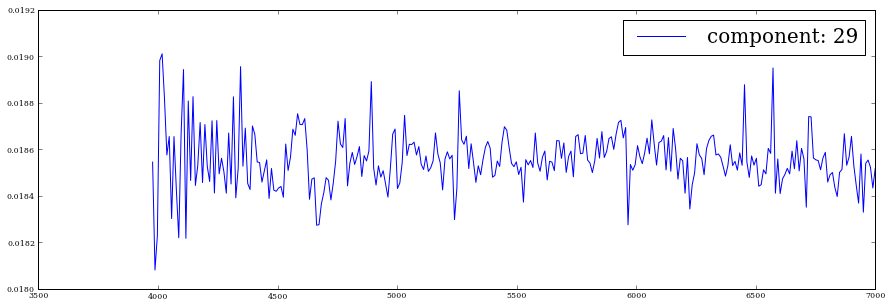

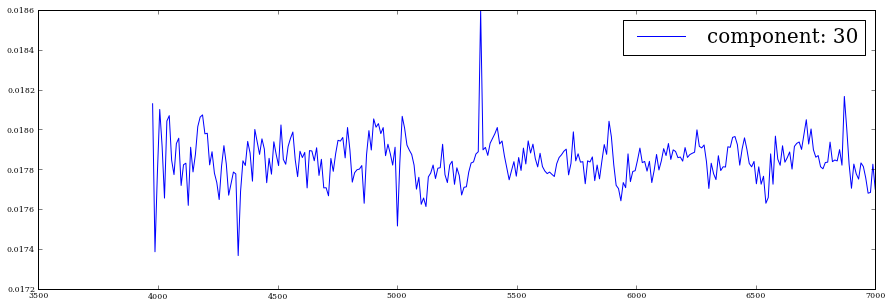

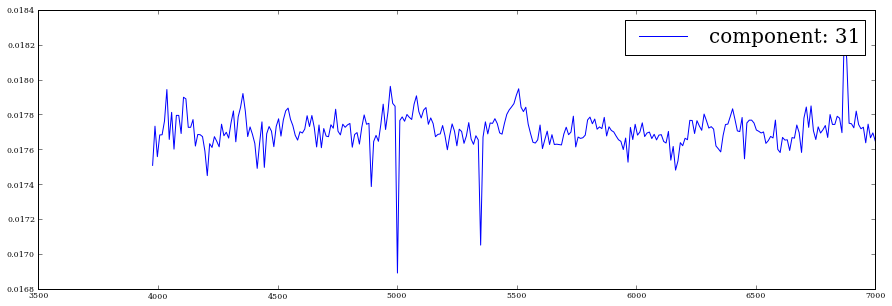

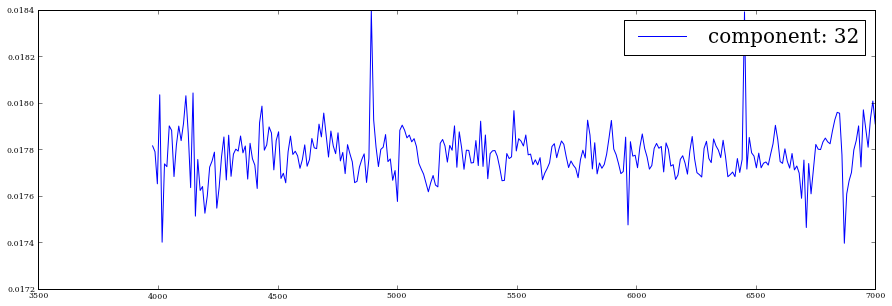

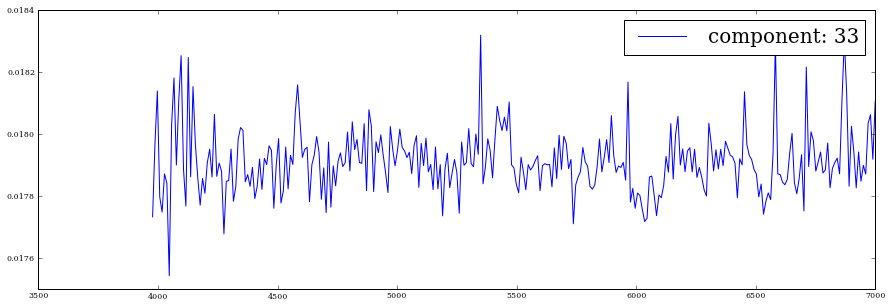

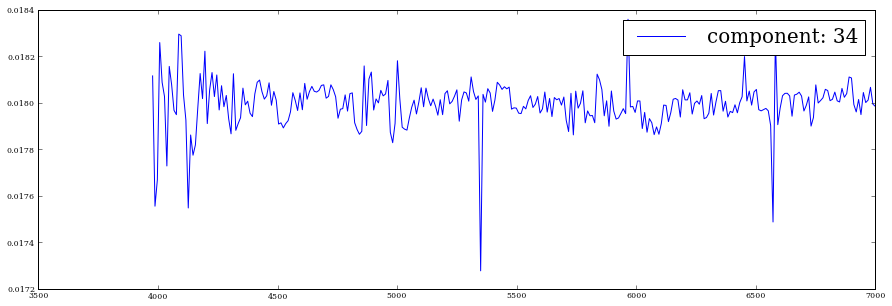

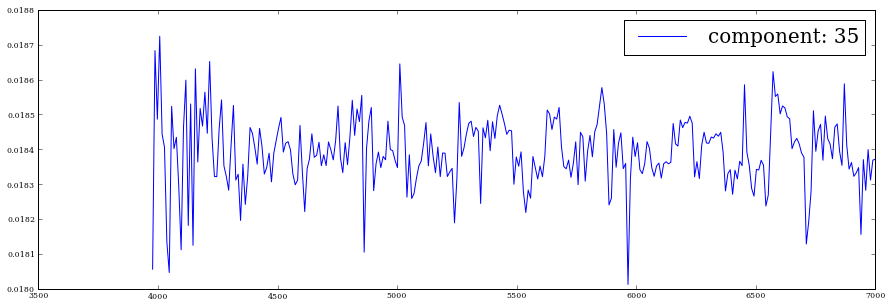

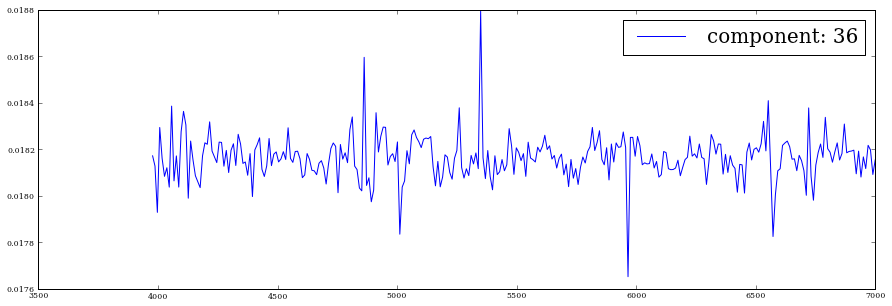

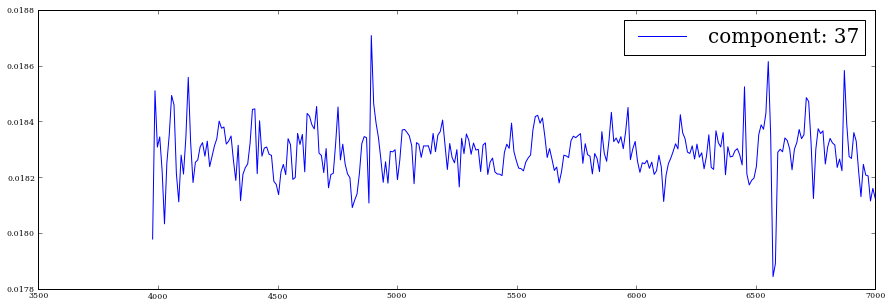

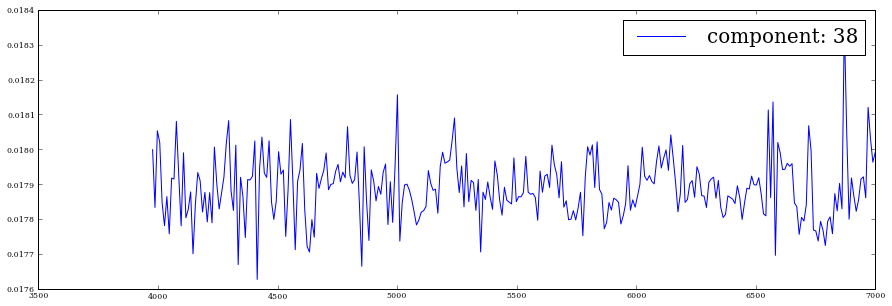

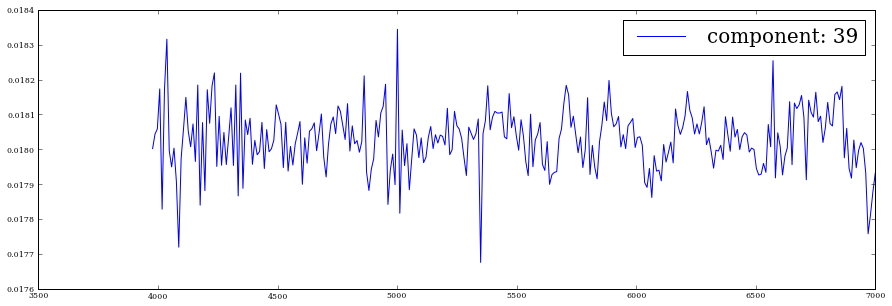

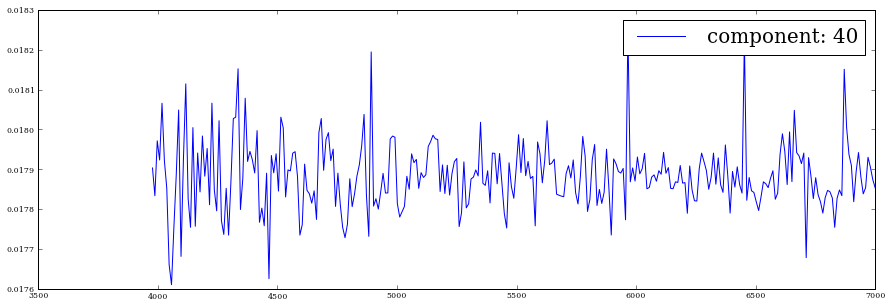

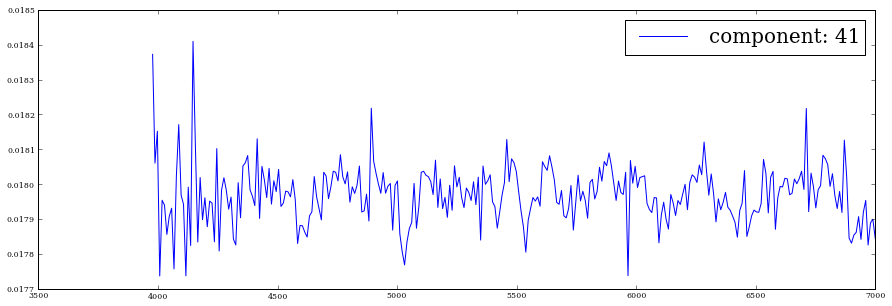

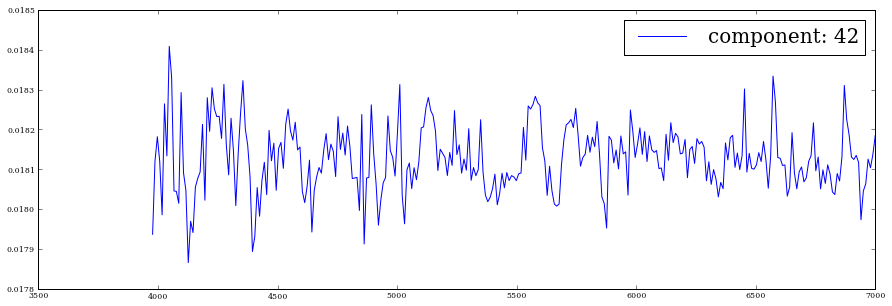

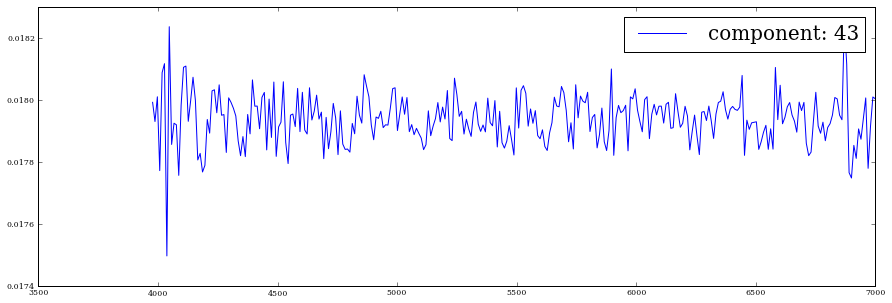

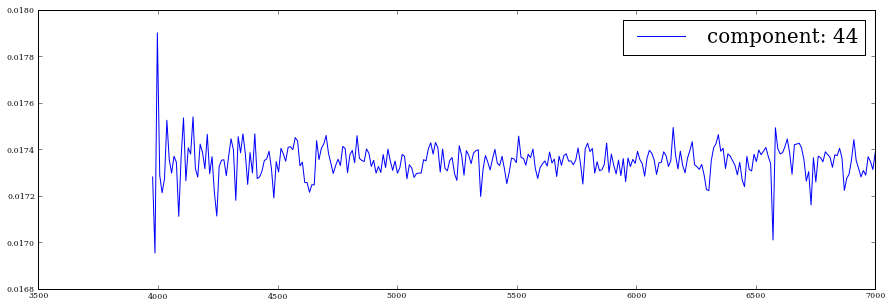

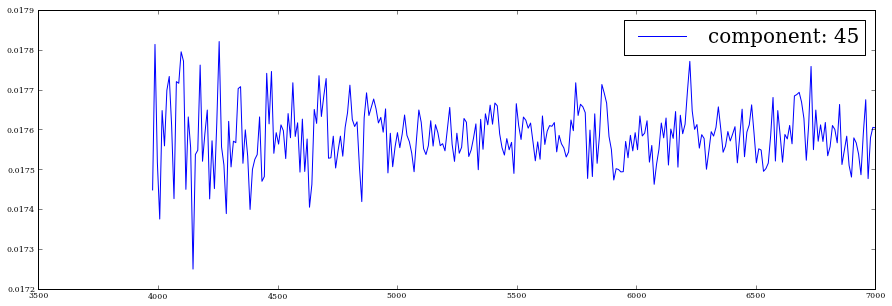

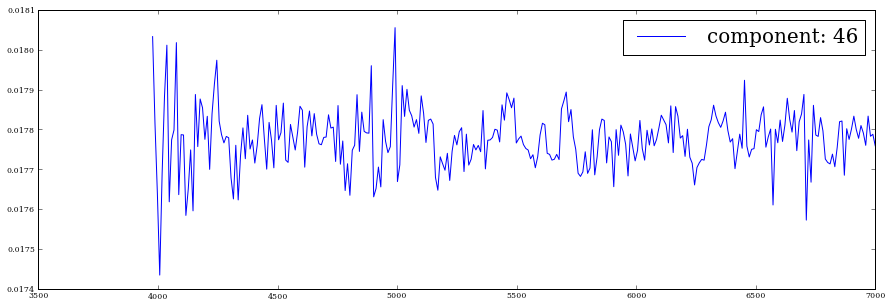

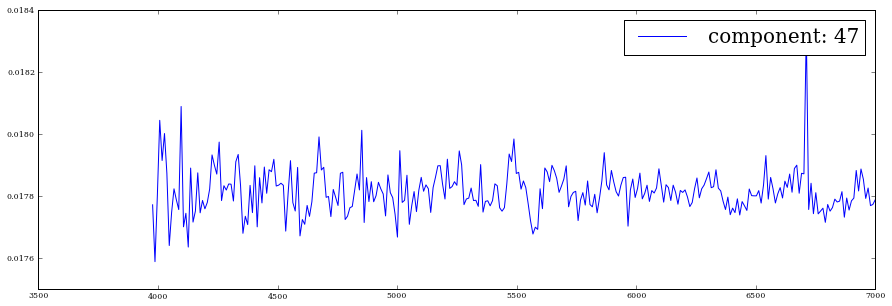

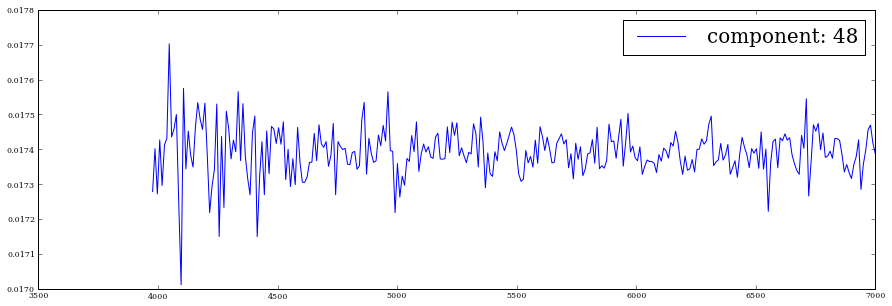

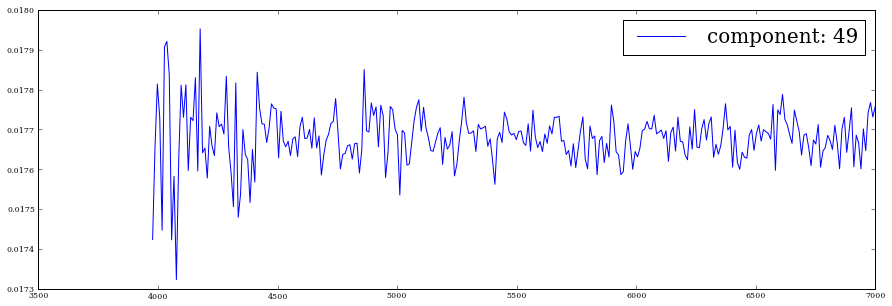

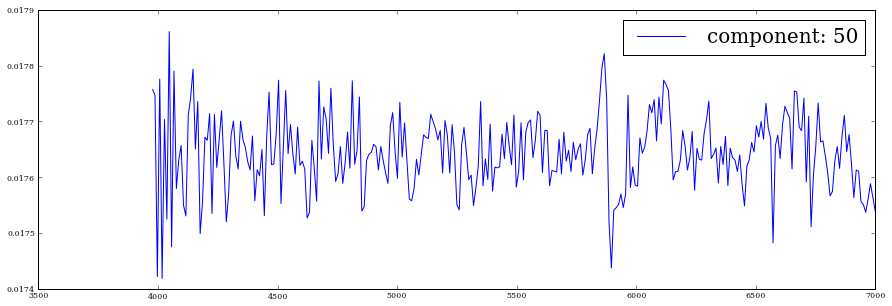

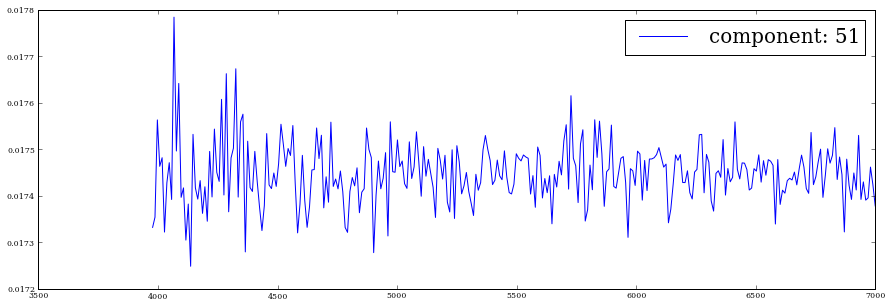

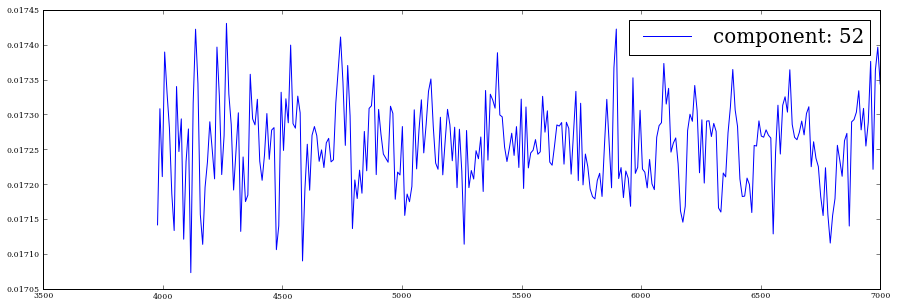

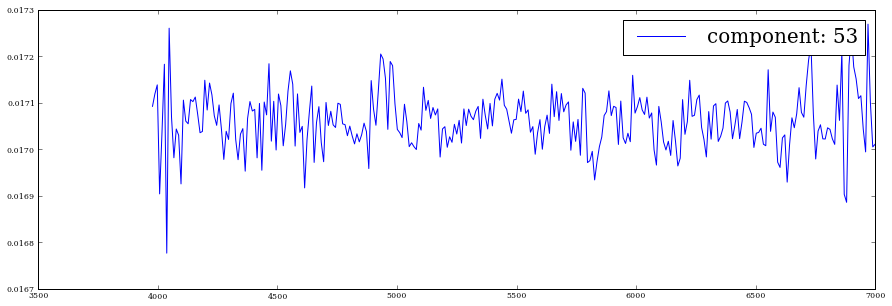

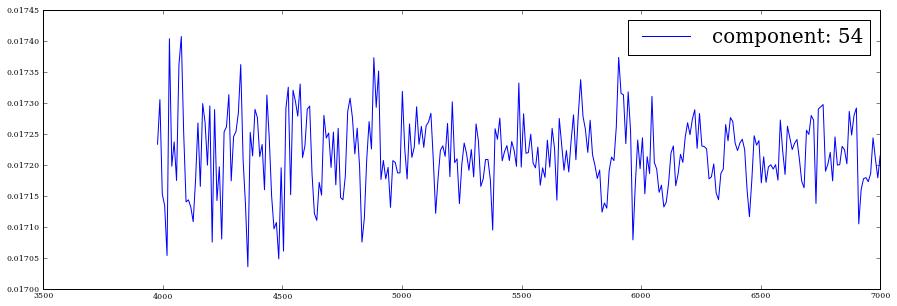

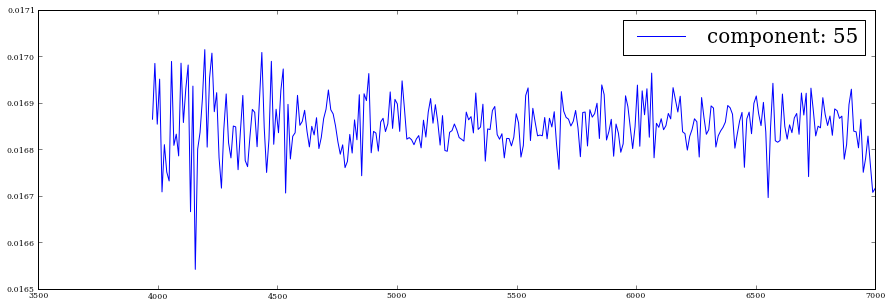

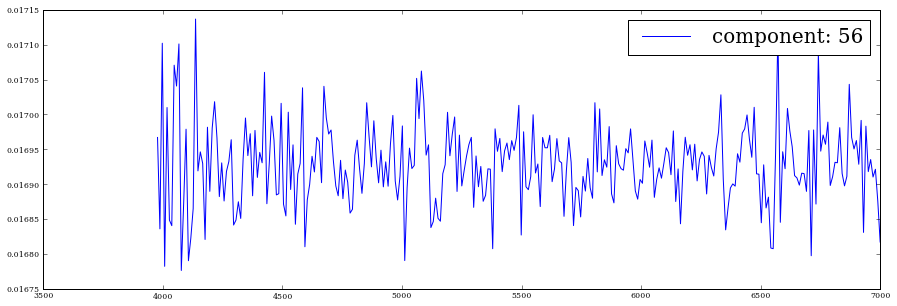

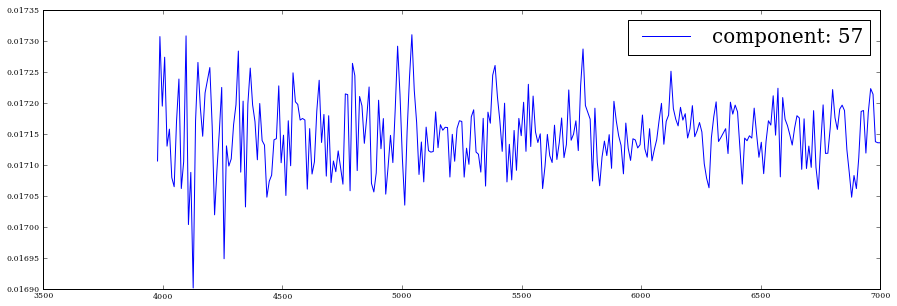

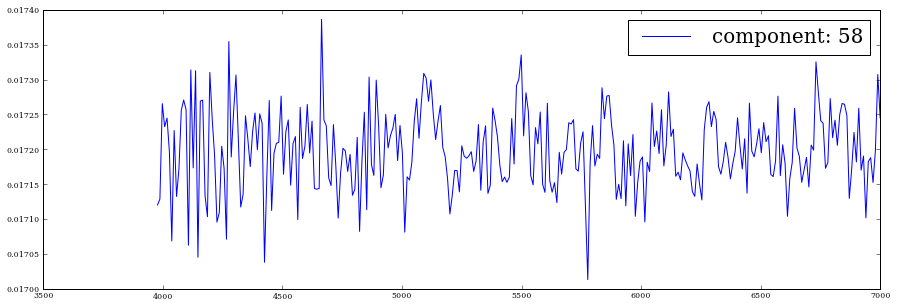

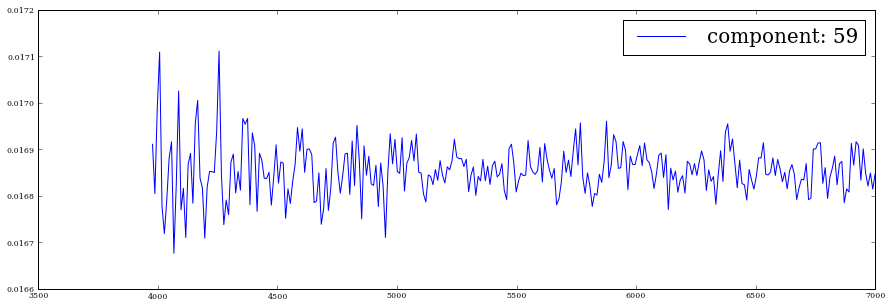

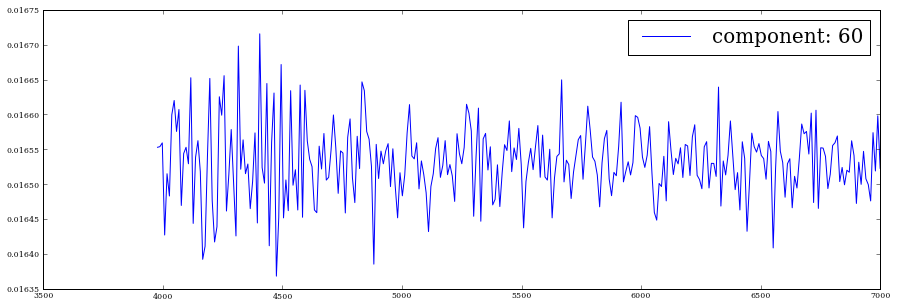

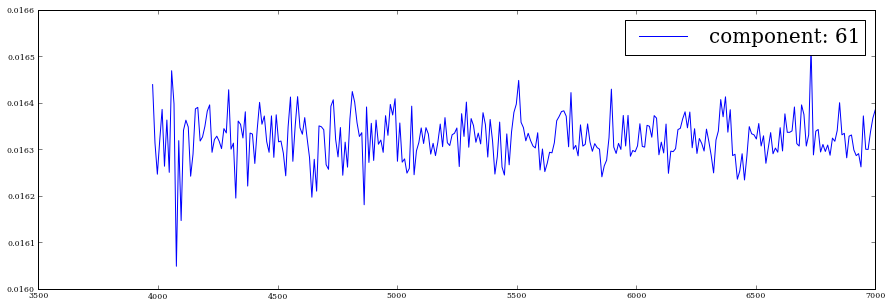

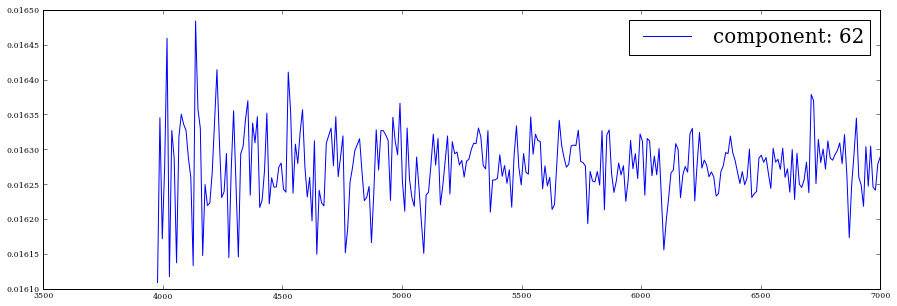

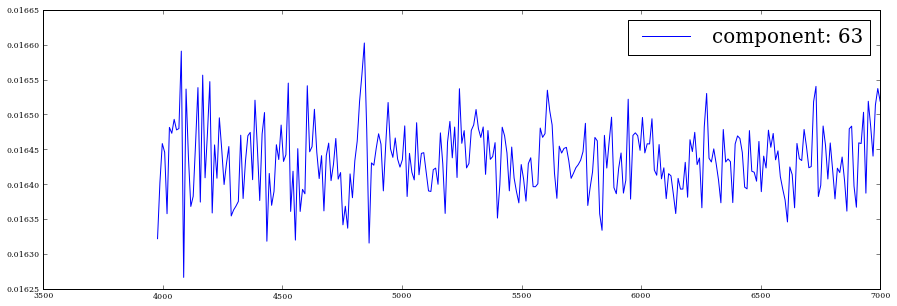

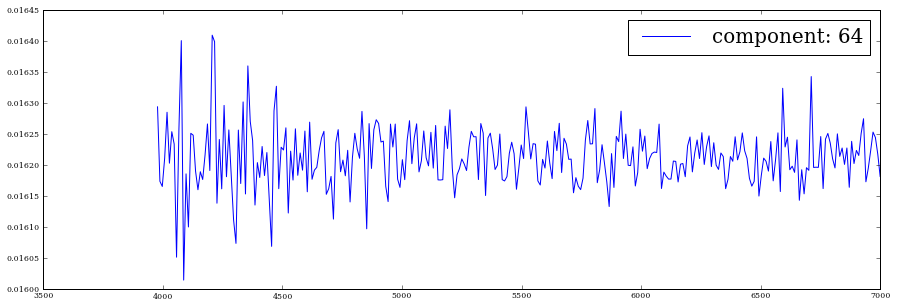

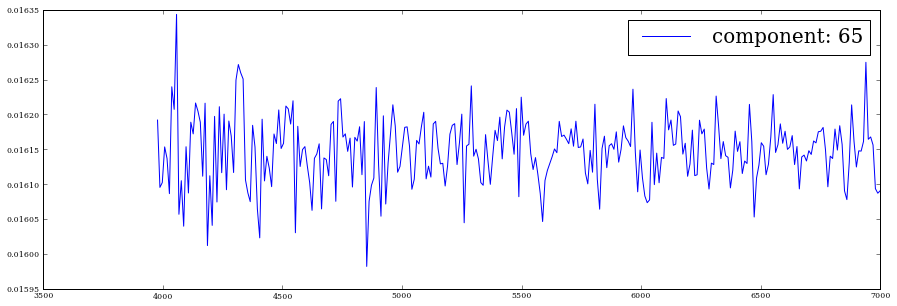

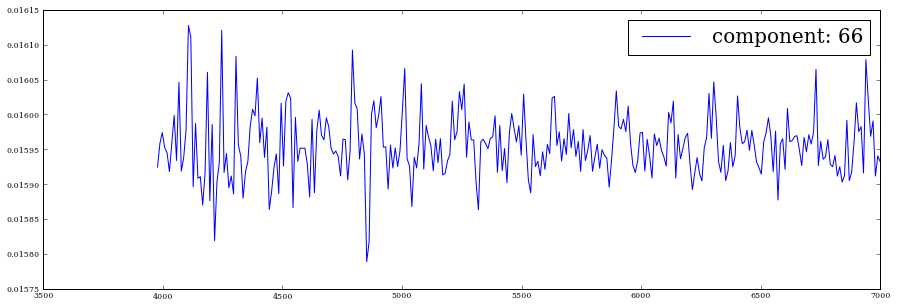

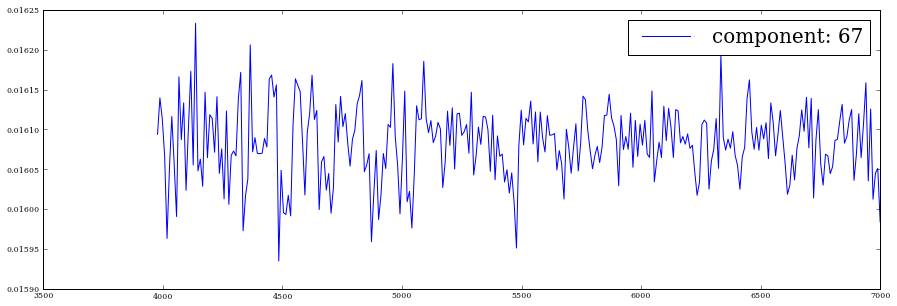

In [ ]:
#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(spectra)
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
#evals = data['evals'] ** 2
#evals_cs = evals.cumsum()
#evals_cs /= evals_cs[-1]
#evecs=data['evecs']

evecs = pca.components_

for i,ev in enumerate(evecs):
    plt.figure(figsize=(15,5))
    plt.plot(wavelengths,evals[i]*(ev+i*0.3), label="component: %d"%i)
    plt.legend(fontsize=20)
spec_mean = spectra.mean(0)

### reconstruct 10 randomely selected spectra

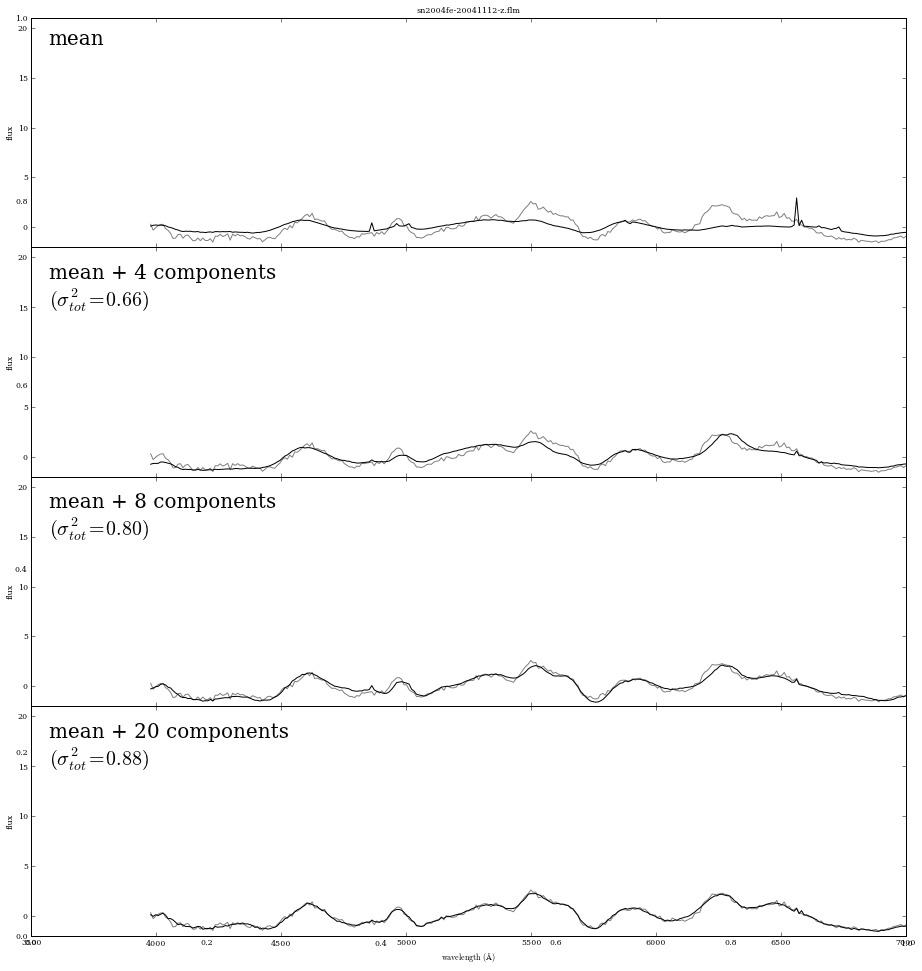

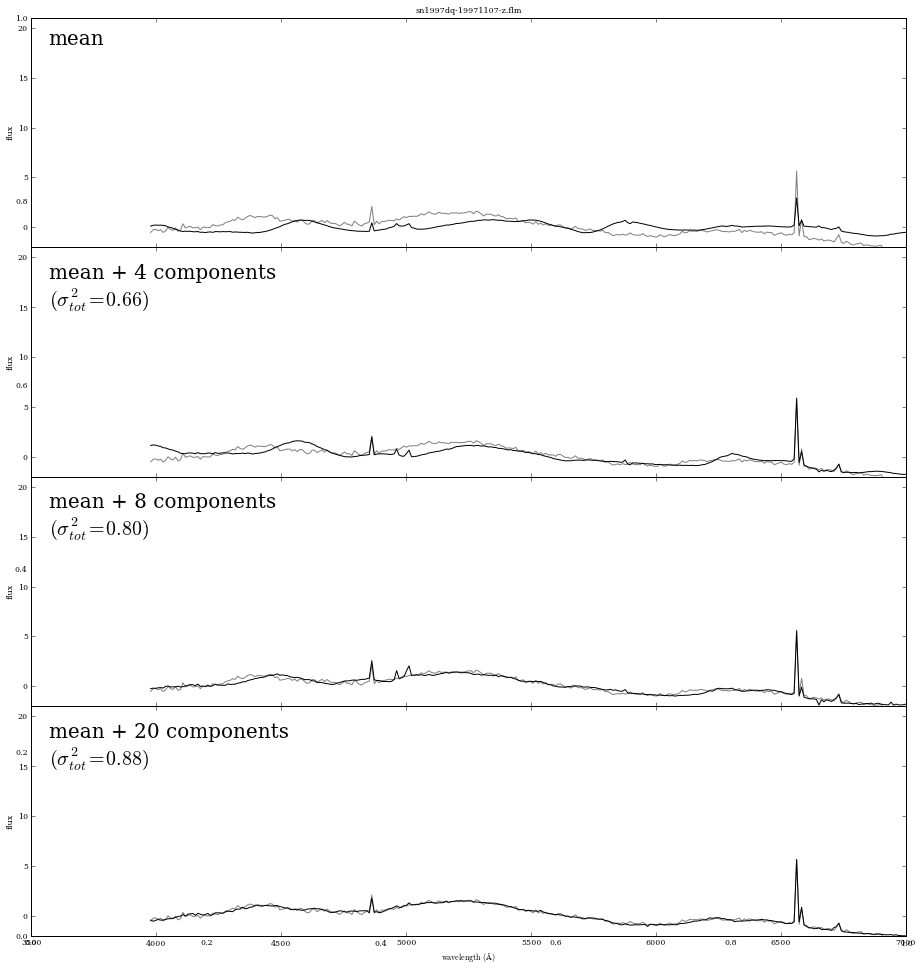

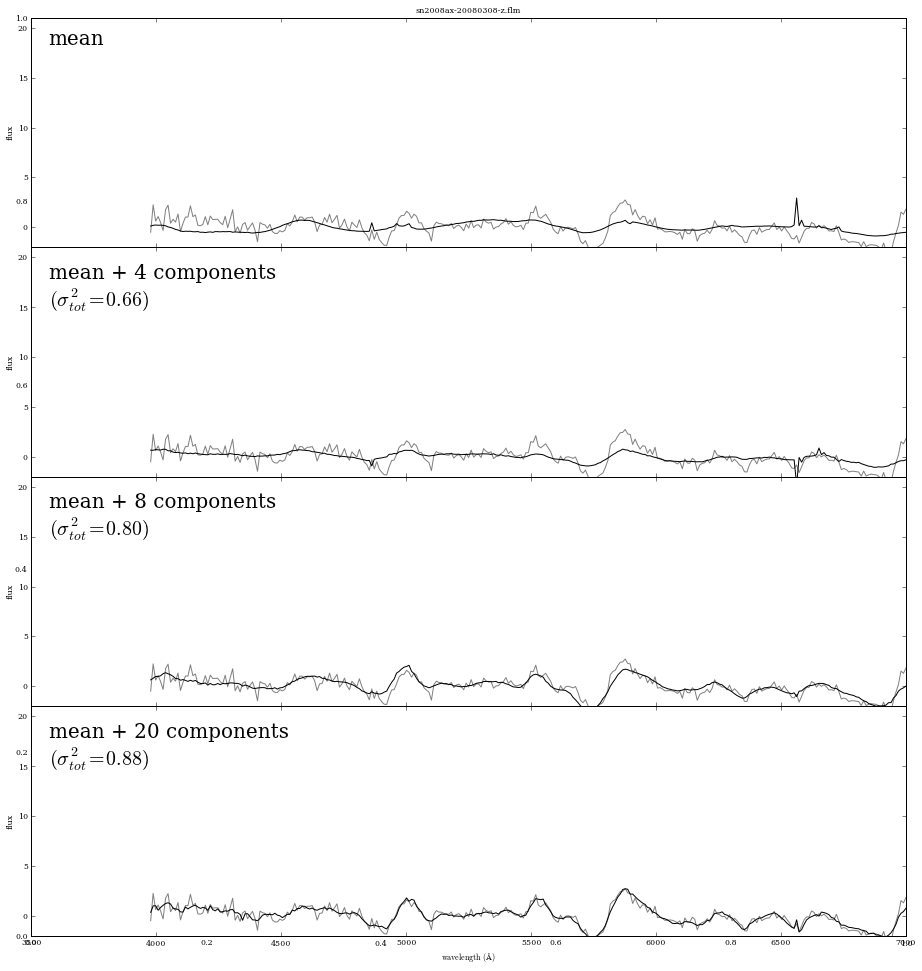

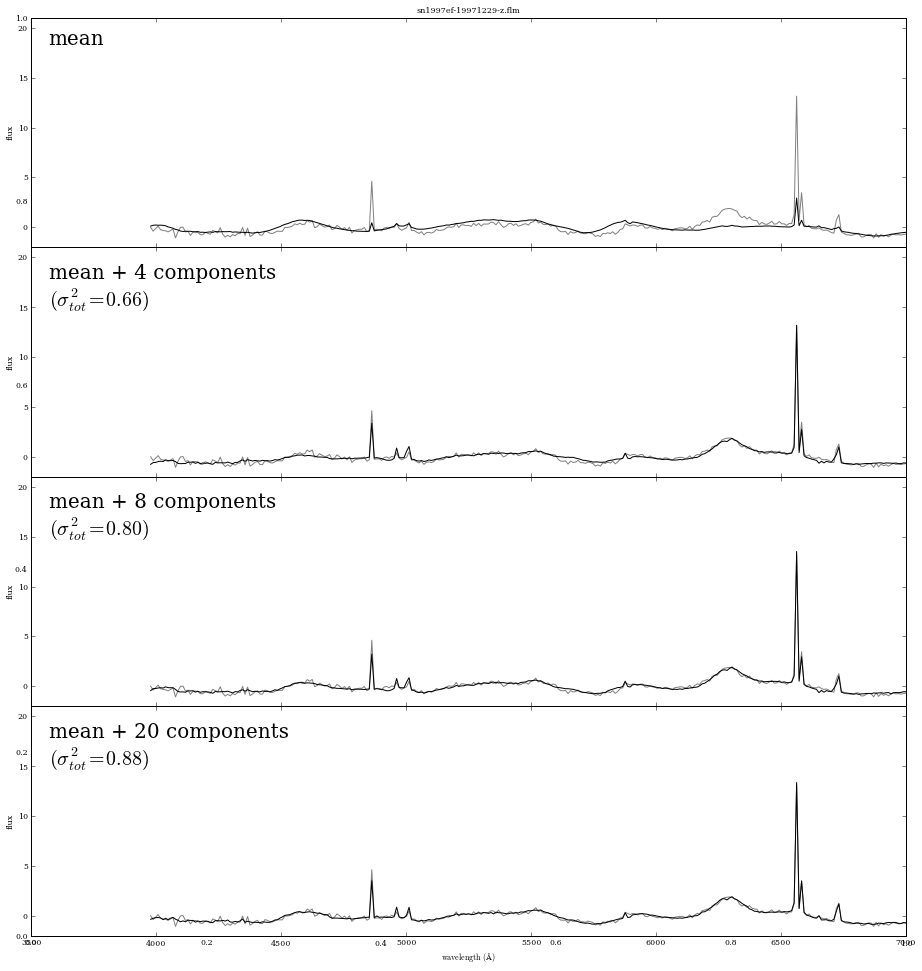

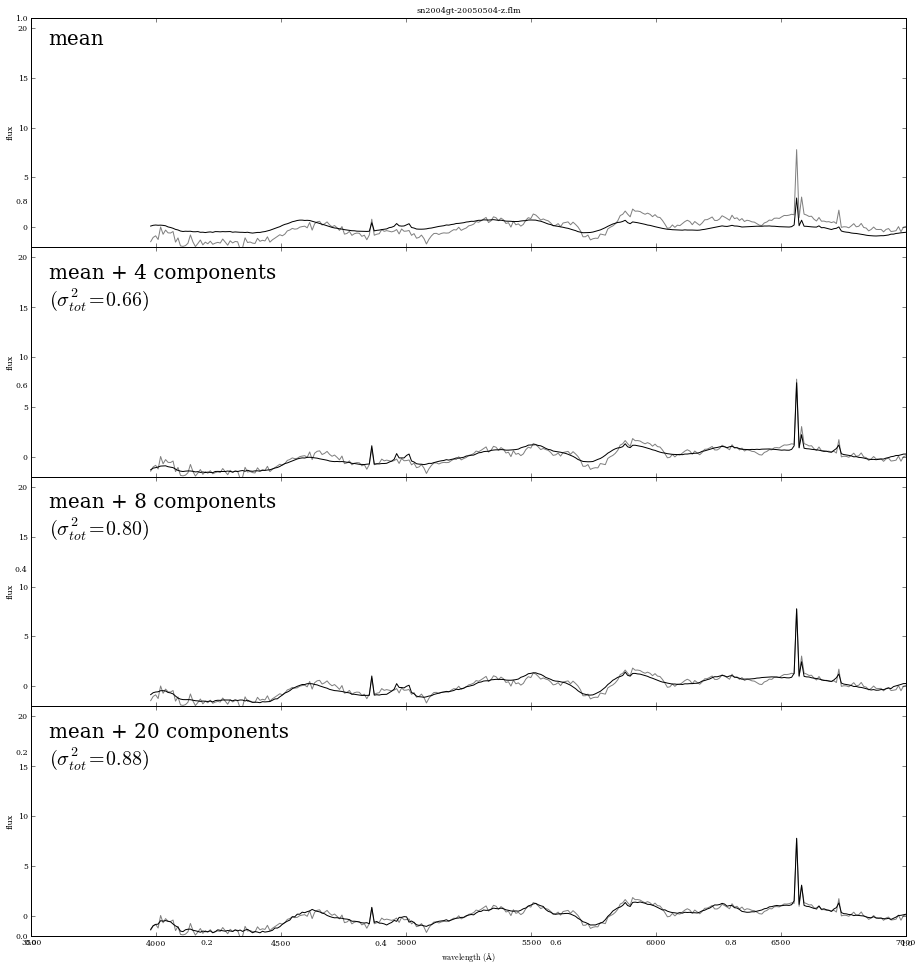

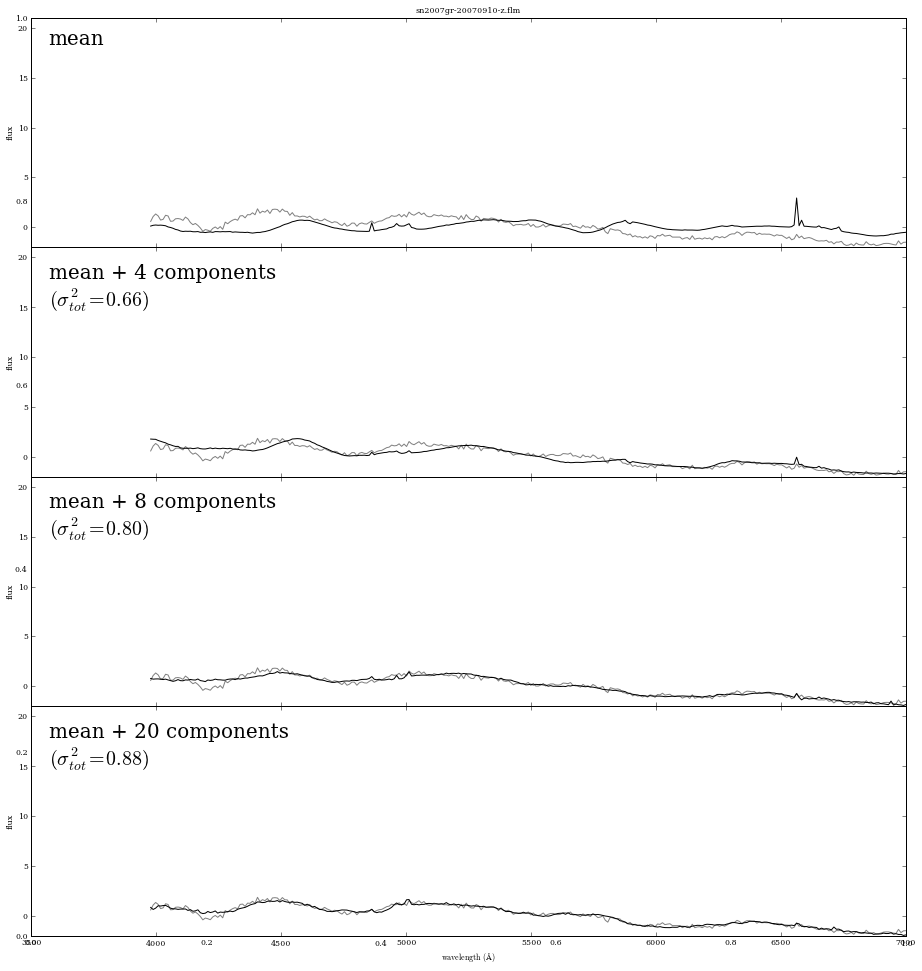

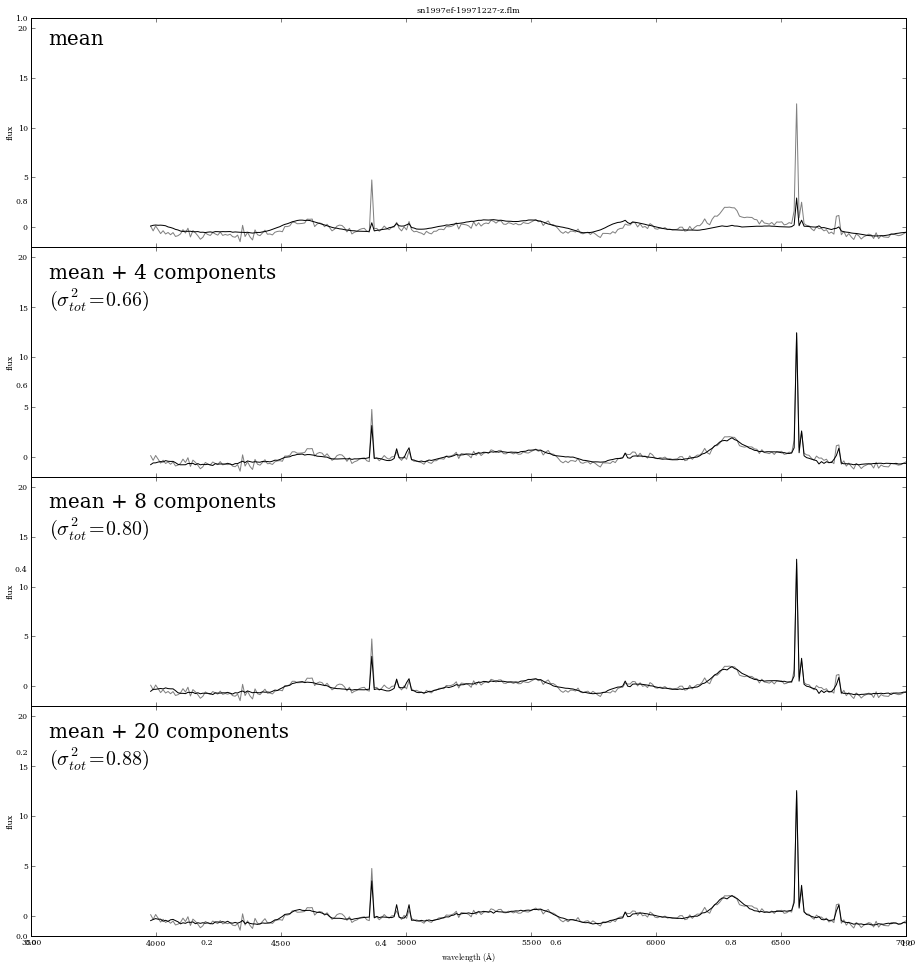

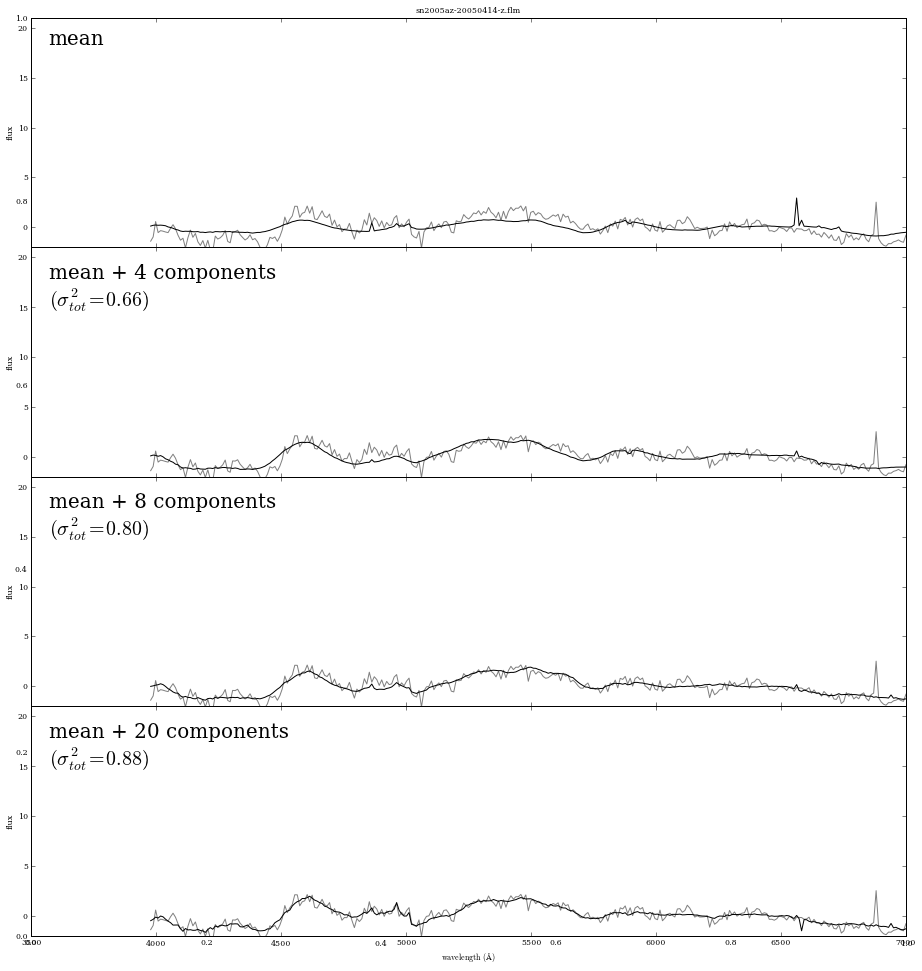

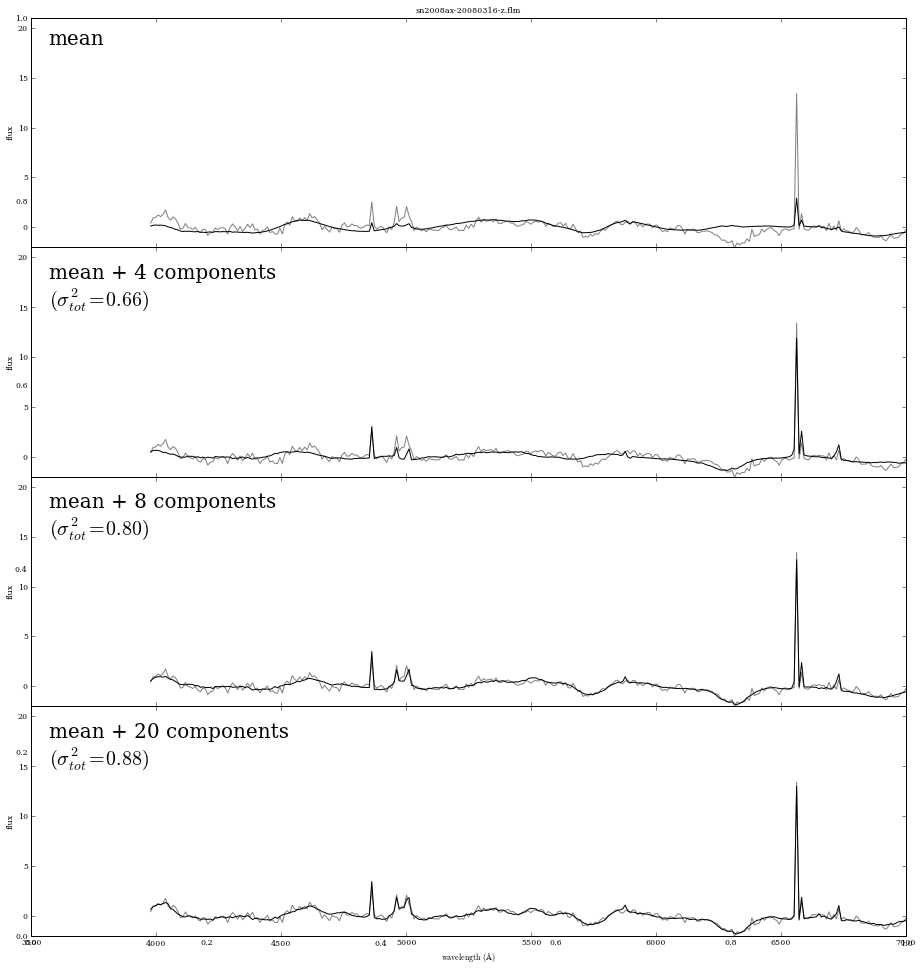

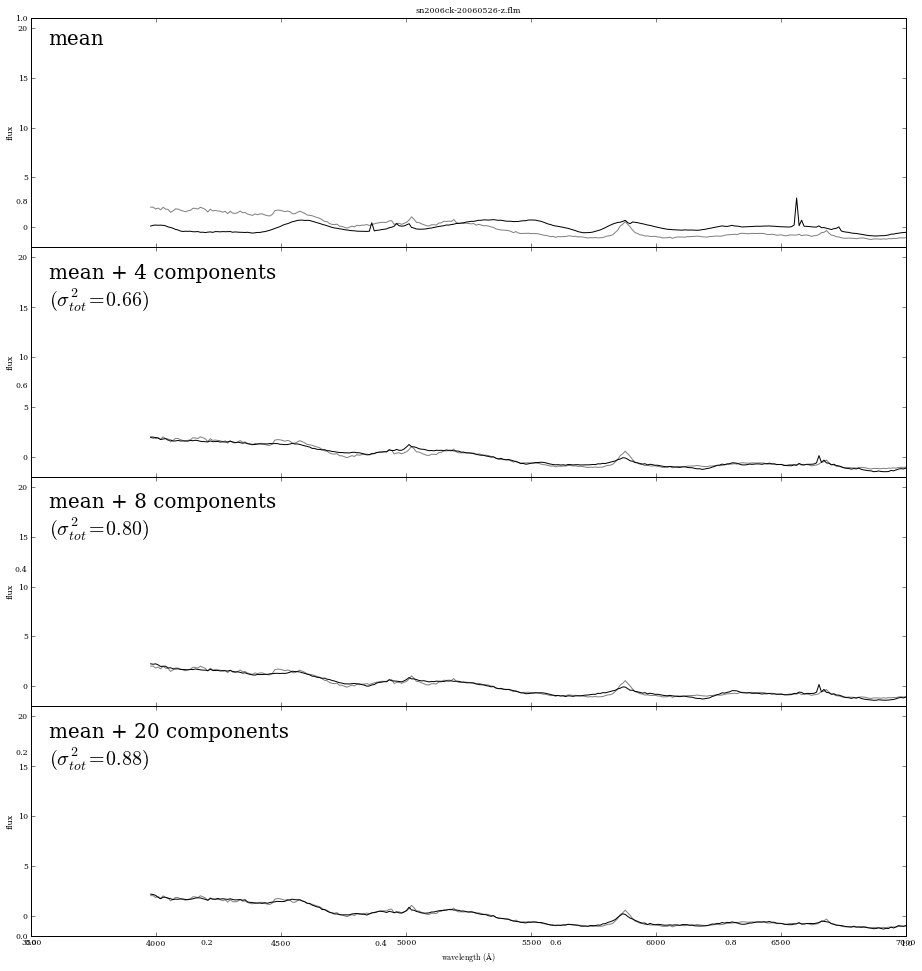

In [6]:
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
for j in range(10):

    specn=np.random.randint(0,len(spectra))

    
    spec = spectra[specn]    
    coeff = np.dot(evecs, spec - spec_mean)
    
    #------------------------------------------------------------
    # Plot the sequence of reconstructions
    fig = plt.figure(j, figsize=(15, 15))
    plt.title(flist[specn].split('/')[-1].strip())
    fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

    for i, n in enumerate([0, 4, 8, 20]):#, len(pca.components_)]):
        ax = fig.add_subplot(411 + i)
        ax.plot(wavelengths, spec, '-', c='gray')
        ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')
        
        if i < 3:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
            
        ax.set_ylim(-2, 21)
        ax.set_ylabel('flux')

        if n == 0:
            text = "mean"
        elif n == 1:
            text = "mean + 1 component\n"
            text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
        else:
            text = "mean + %i components\n" % n
            text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
            
        ax.text(0.02, 0.93, text, fontsize=20,ha='left', va='top', transform=ax.transAxes)

        fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()